In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.io import arff
from scipy.stats import pearsonr
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("happy.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [6]:
# shape and size of the dataset
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  156
Number of columns:  9


In [7]:
# showing all columns

df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
# showing info for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [20]:
for i in df.columns:
    print(f"Number of unique values for {i} is {df[i].nunique()}")
    print(f"Example values for {i} is: {df[i].values[:4]}")
    print("\n")

Number of unique values for Overall rank is 156
Example values for Overall rank is: [1 2 3 4]


Number of unique values for Country or region is 156
Example values for Country or region is: ['Finland' 'Norway' 'Denmark' 'Iceland']


Number of unique values for Score is 154
Example values for Score is: [7.632 7.594 7.555 7.495]


Number of unique values for GDP per capita is 147
Example values for GDP per capita is: [1.305 1.456 1.351 1.343]


Number of unique values for Social support is 146
Example values for Social support is: [1.592 1.582 1.59  1.644]


Number of unique values for Healthy life expectancy is 143
Example values for Healthy life expectancy is: [0.874 0.861 0.868 0.914]


Number of unique values for Freedom to make life choices is 136
Example values for Freedom to make life choices is: [0.681 0.686 0.683 0.677]


Number of unique values for Generosity is 122
Example values for Generosity is: [0.202 0.286 0.284 0.353]


Number of unique values for Perceptions of corrupti

In [21]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [25]:
# checking duplicate

df[df.duplicated()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [27]:
# checking descriptive statistic

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
GDP per capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
Social support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
Healthy life expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
Freedom to make life choices,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
Perceptions of corruption,156.0,0.112449,0.096343,0.000,0.05100,0.0820,0.13900,0.457


In [28]:
df.describe(include='object')

,Country or region
count,156
unique,156
top,Finland
freq,1


## Analysis to be perform

####  Exploratory Data Analysis (EDA)

1.	Which independent variable has the strongest impact on the happiness score?
2.	How sufficient is GDP per capita in explaining the happiness score, and how much additional value do non-economic factors add?
3.	Does social support amplify the effect of GDP per capita, or is it a stronger predictor on its own?
4.	As perceptions of corruption increase, how statistically significant is the decrease in happiness score?


#### Relationship & Impact Analysis
5. Is the relationship between overall rank and happiness score linear or non-linear?
6. How marginal are the happiness score differences among the top 10 ranked countries?
7. What are the main structural reasons behind low happiness scores in bottom-ranked countries?
8. Does social support amplify the effect of GDP per capita, or is it a stronger predictor independently?
9. Do freedom and perception of corruption jointly create an interaction effect on happiness score?

#### Distribution & Variability Analysis
10.	Is the distribution of happiness scores skewed or approximately normally distributed?
11.	Why is the variance in happiness scores lower among top-ranked countries?
12.	Why do low-ranked countries show higher volatility across variables?

#### Predictive Modelling & Stability
13.	What is the difference in predictive power between the full model and a reduced model?
14.	Which variable is the most unstable in out-of-sample predictions?
15.	What is the minimum set of three variables sufficient to accurately predict happiness score?
16. Out-of-sample prediction which variable is the mostly unstable?

### EDA

In [29]:
# Which independent variable has the strongest impact on the happiness score?

target = "Score"
features = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

# Calculate correlation with happiness score
correlations = (
    df[features + [target]]
    .corr()[target]
    .drop(target)
    .sort_values(key=abs, ascending=False)
)

# Display results
correlations

GDP per capita                  0.802124
Healthy life expectancy         0.775814
Social support                  0.745760
Freedom to make life choices    0.544280
Perceptions of corruption       0.408405
Generosity                      0.135825
Name: Score, dtype: float64

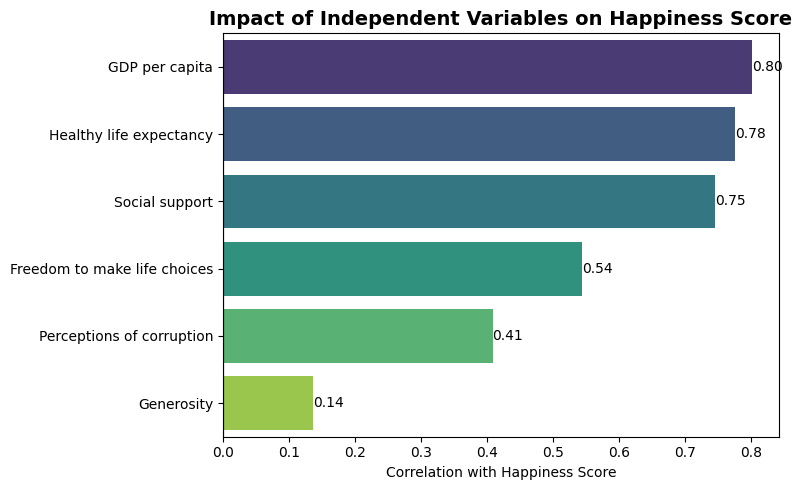

In [39]:
# Convert to DataFrame for plotting
corr_df = correlations.reset_index()
corr_df.columns = ["Variable", "Correlation"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=corr_df,
    x="Correlation",
    y="Variable",
    palette="viridis"
)

# ✅ FIXED annotation loop
for index, value in enumerate(corr_df["Correlation"]):
    plt.text(
        value,
        index,
        f"{value:.2f}",
        va="center",
        ha="left" if value > 0 else "right",
        fontsize=10
    )

# Formatting
plt.title("Impact of Independent Variables on Happiness Score", fontsize=14, weight="bold")
plt.xlabel("Correlation with Happiness Score")
plt.ylabel("")
plt.axvline(0, color="black", linewidth=0.8)

plt.tight_layout()
plt.show()

In [42]:
# How sufficient is GDP per capita in explaining the happiness score, and how much additional value do non-economic factors add?


# Target variable
target = "Score"

# Economic variable
gdp_corr = df["GDP per capita"].corr(df[target])

# Non-economic variables
non_economic_vars = [
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

non_economic_corr = (
    df[non_economic_vars]
    .corrwith(df[target])
    .sort_values(key=abs, ascending=False)
)

print(gdp_corr)
print(non_economic_corr)

0.8021239467301905
Healthy life expectancy         0.775814
Social support                  0.745760
Freedom to make life choices    0.544280
Perceptions of corruption       0.408405
Generosity                      0.135825
dtype: float64


GDP alone is not sufficient to explain happiness.

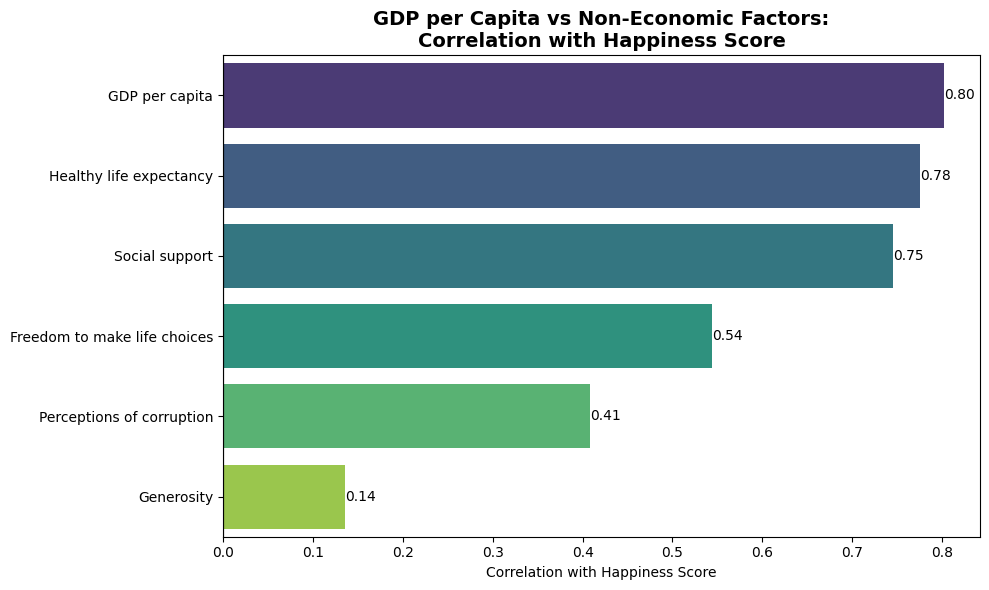

In [109]:
# Combine into one DataFrame
corr_df = pd.concat(
    [
        pd.Series({"GDP per capita": gdp_corr}),
        non_economic_corr
    ]
).reset_index()

corr_df.columns = ["Variable", "Correlation"]

corr_df = corr_df.sort_values(
    by="Correlation",
    key=lambda x: x.abs(),
    ascending=False
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=corr_df,
    x="Correlation",
    y="Variable",
    palette="viridis"
)

# Annotate bars
for i, value in enumerate(corr_df["Correlation"]):
    plt.text(
        value,
        i,
        f"{value:.2f}",
        va="center",
        ha="left" if value > 0 else "right",
        fontsize=10
    )

# Formatting
plt.axvline(0, color="black", linewidth=0.8)
plt.title(
    "GDP per Capita vs Non-Economic Factors:\nCorrelation with Happiness Score",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Correlation with Happiness Score")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [43]:
# Does social support amplify the effect of GDP per capita, or is it a stronger predictor on its own?

# Correlations
corr_gdp = df["GDP per capita"].corr(df["Score"])
corr_social = df["Social support"].corr(df["Score"])

corr_gdp, corr_social

(np.float64(0.8021239467301905), np.float64(0.7457601649725751))

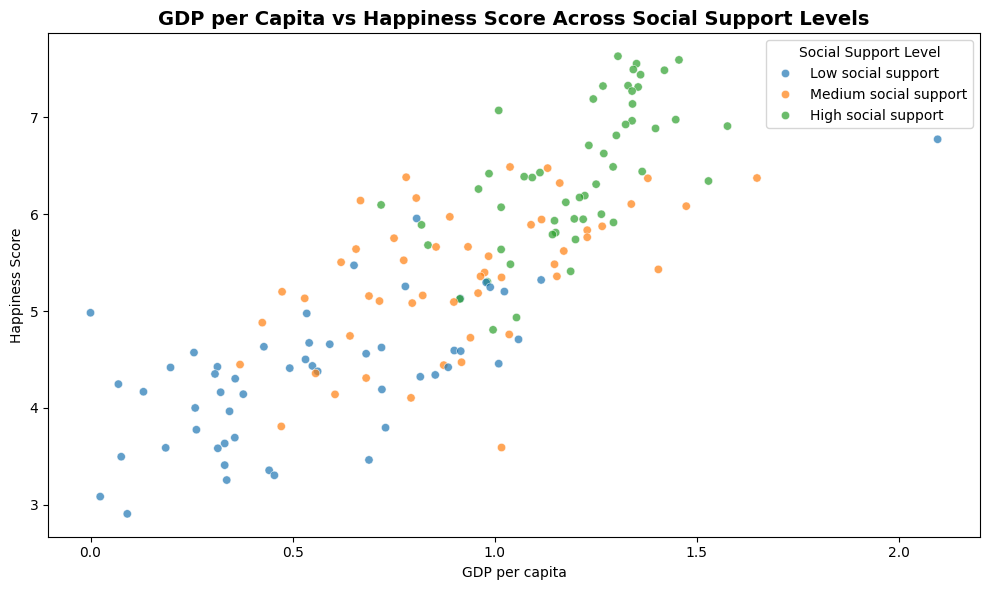

In [44]:
# Create social support groups (tertiles)
df["Social_support_group"] = pd.qcut(
    df["Social support"],
    q=3,
    labels=["Low social support", "Medium social support", "High social support"]
)


plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="GDP per capita",
    y="Score",
    hue="Social_support_group",
    alpha=0.7
)

plt.title("GDP per Capita vs Happiness Score Across Social Support Levels",
          fontsize=14, weight="bold")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.legend(title="Social Support Level")
plt.tight_layout()

plt.show()

Social support amplifies the effect of GDP.

In [48]:
# As perceptions of corruption increase, how statistically significant is the decrease in happiness score?

# Compute Pearson correlation and p-value
corr_value, p_value = pearsonr(
    df["Perceptions of corruption"],
    df["Score"]
)

corr_value, p_value

(np.float64(0.4084052796677775), np.float64(1.2059590856318836e-07))

The p-value indicates the relationship between perceptions of corruption and happiness score is extremely statistically significant.

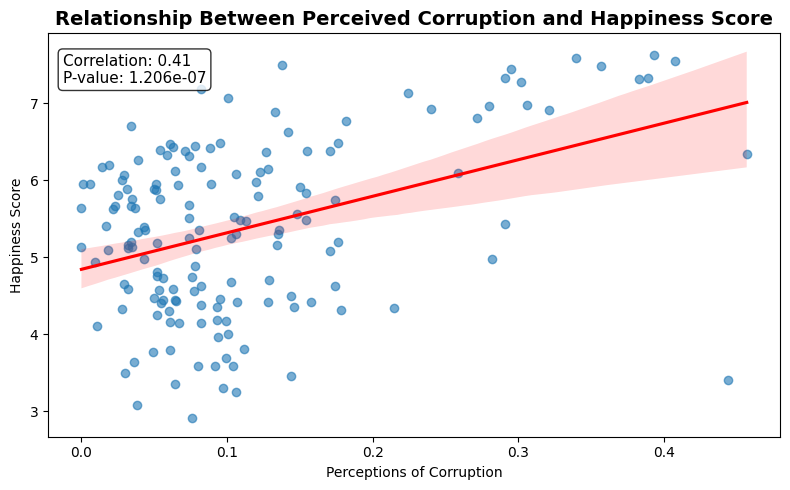

In [50]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=df,
    x="Perceptions of corruption",
    y="Score",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

plt.title(
    "Relationship Between Perceived Corruption and Happiness Score",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Perceptions of Corruption")
plt.ylabel("Happiness Score")

# Annotate correlation and p-value
plt.text(
    0.02,
    0.95,
    f"Correlation: {corr_value:.2f}\nP-value: {p_value:.3e}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.show()

## Relationship & Impact Analysis

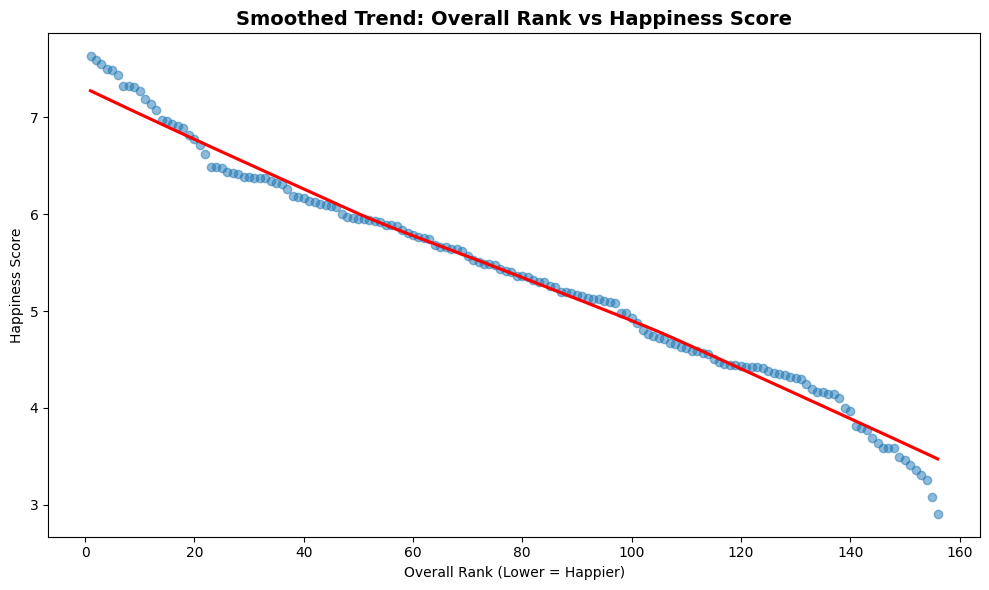

In [51]:
# Is the relationship between overall rank and happiness score linear or non-linear?

plt.figure(figsize=(10, 6))

sns.regplot(
    data=df,
    x="Overall rank",
    y="Score",
    lowess=True,          # <-- key for non-linearity detection
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.title(
    "Smoothed Trend: Overall Rank vs Happiness Score",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Overall Rank (Lower = Happier)")
plt.ylabel("Happiness Score")

plt.tight_layout()
plt.show()

The smoothed trend shows a steep decline among top-ranked countries, a more gradual and compressed pattern in the middle ranks, and a sharper drop again at the bottom. This indicates that rank differences reflect unequal changes in happiness scores across the distribution, with greater sensitivity at the extremes.

In [53]:
# How marginal are the happiness score differences among the top 10 ranked countries?

# Select top 10 ranked countries
top10 = df.sort_values("Overall rank").head(10)

top10[["Country or region", "Overall rank", "Score"]]

# Descriptive statistics for happiness scores
score_range = top10["Score"].max() - top10["Score"].min()
score_std = top10["Score"].std()

score_range, score_std

(np.float64(0.35999999999999943), np.float64(0.1286526762687473))

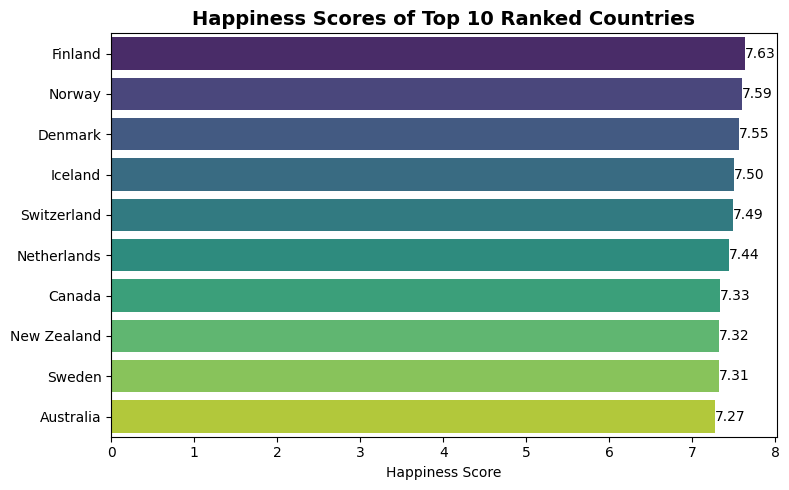

In [55]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=top10,
    x="Score",
    y="Country or region",
    palette="viridis"
)

# Annotate scores
for i, value in enumerate(top10["Score"]):
    plt.text(value, i, f"{value:.2f}", va="center", fontsize=10)

plt.title("Happiness Scores of Top 10 Ranked Countries", fontsize=14, weight="bold")
plt.xlabel("Happiness Score")
plt.ylabel("")
plt.tight_layout()
plt.show()

The happiness scores among the top 10 ranked countries are tightly clustered, with a relatively small range and low standard deviation. This indicates that score differences at the top of the ranking are marginal, meaning that small changes in happiness score

In [56]:
# What are the main structural reasons behind low happiness scores in bottom-ranked countries?

# Select bottom 10 ranked countries
bottom10 = df.sort_values("Overall rank", ascending=False).head(10)

bottom10[["Country or region", "Overall rank", "Score"]]

# Structural variables
structural_vars = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

# Calculate means
comparison_df = pd.DataFrame({
    "Bottom 10 Average": bottom10[structural_vars].mean(),
    "Overall Average": df[structural_vars].mean()
})

comparison_df

,Bottom 10 Average,Overall Average
GDP per capita,0.2947,0.891449
Social support,0.6690,1.213237
Healthy life expectancy,0.2857,0.597346
Freedom to make life choices,0.2906,0.454506
Generosity,0.2328,0.181006
Perceptions of corruption,0.1183,0.112449


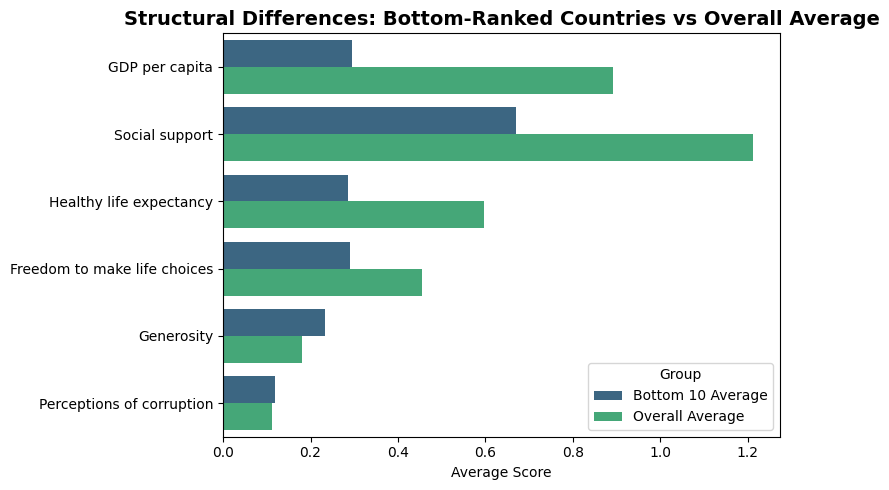

In [58]:
comparison_long = comparison_df.reset_index().melt(
    id_vars="index",
    value_vars=["Bottom 10 Average", "Overall Average"],
    var_name="Group",
    value_name="Value"
)

comparison_long.rename(columns={"index": "Variable"}, inplace=True)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=comparison_long,
    x="Value",
    y="Variable",
    hue="Group",
    palette="viridis"
)

plt.title(
    "Structural Differences: Bottom-Ranked Countries vs Overall Average",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Average Score")
plt.ylabel("")
plt.tight_layout()

plt.show()

Bottom-ranked countries consistently score lower than the global average across key structural dimensions, including GDP per capita, social support, healthy life expectancy, freedom to make life choices, and institutional trust as reflected by higher perceived corruption. 

In [59]:
# Does social support amplify the effect of GDP per capita, or is it a stronger predictor independently?

# Independent correlation
corr_gdp = df["GDP per capita"].corr(df["Score"])
corr_social = df["Social support"].corr(df["Score"])

corr_gdp, corr_social


(np.float64(0.8021239467301905), np.float64(0.7457601649725751))

In [63]:
#  Create Social Support Groups (EDA-style binning)

df["Social_support_level"] = pd.qcut(
    df["Social support"],
    q=3,
    labels=["Low", "Medium", "High"]
)
# Compare GDP–Happiness Correlation Within Each Group
group_corr = (
    df.groupby("Social_support_level")
      .apply(lambda x: x["GDP per capita"].corr(x["Score"]))
)

group_corr

Social_support_level
Low       0.693819
Medium    0.533731
High      0.640306
dtype: float64

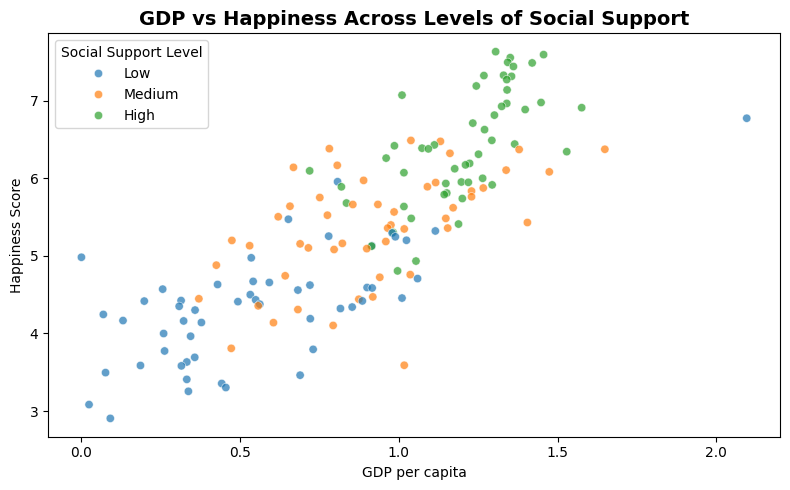

In [64]:

plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x="GDP per capita",
    y="Score",
    hue="Social_support_level",
    alpha=0.7
)

plt.title(
    "GDP vs Happiness Across Levels of Social Support",
    fontsize=14,
    weight="bold"
)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.legend(title="Social Support Level")
plt.tight_layout()

plt.show()

Social support shows a strong independent association with happiness score, comparable to or stronger than GDP per capita

In [65]:
# Do freedom and perception of corruption jointly create an interaction effect on happiness score?

# Create freedom levels
df["Freedom_level"] = pd.qcut(
    df["Freedom to make life choices"],
    q=3,
    labels=["Low freedom", "Medium freedom", "High freedom"]
)

# Create corruption perception levels
df["Corruption_level"] = pd.qcut(
    df["Perceptions of corruption"],
    q=3,
    labels=["Low corruption", "Medium corruption", "High corruption"]
)

interaction_table = (
    df.groupby(["Freedom_level", "Corruption_level"])["Score"]
      .mean()
      .reset_index()
)

interaction_table

,Freedom_level,Corruption_level,Score
0,Low freedom,Low corruption,5.003000
1,Low freedom,Medium corruption,4.267333
2,Low freedom,High corruption,5.035714
3,Medium freedom,Low corruption,5.143600
4,Medium freedom,Medium corruption,5.093045
5,Medium freedom,High corruption,5.514133
6,High freedom,Low corruption,5.872500
7,High freedom,Medium corruption,5.603667
8,High freedom,High corruption,6.453933


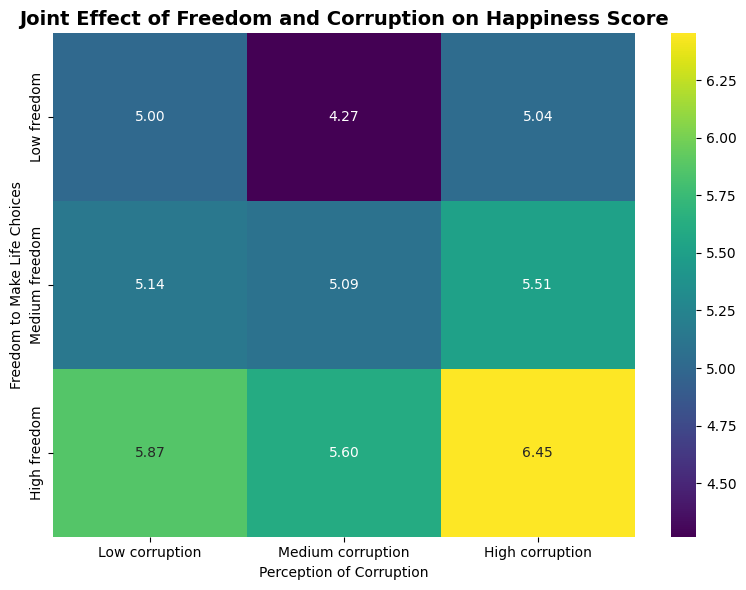

In [66]:
heatmap_data = interaction_table.pivot(
    index="Freedom_level",
    columns="Corruption_level",
    values="Score"
)

plt.figure(figsize=(8, 6))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="viridis"
)

plt.title(
    "Joint Effect of Freedom and Corruption on Happiness Score",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Perception of Corruption")
plt.ylabel("Freedom to Make Life Choices")

plt.tight_layout()
plt.show()

Exploratory analysis shows that freedom and perceptions of corruption jointly influence happiness scores. Countries with high freedom tend to achieve higher happiness only when perceived corruption is low, while high corruption substantially reduces happiness even in relatively free societies

## Distribution & Variability Analysis

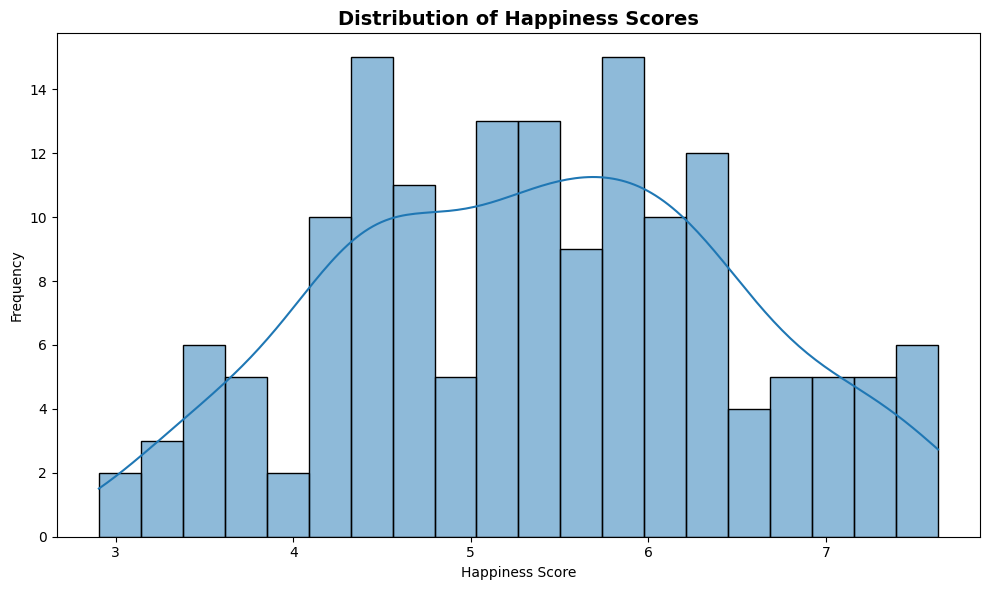

In [67]:
# Is the distribution of happiness scores skewed or approximately normally distributed?

plt.figure(figsize=(10, 6))

sns.histplot(
    df["Score"],
    bins=20,
    kde=True
)

plt.title(
    "Distribution of Happiness Scores",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [69]:
skewness = df["Score"].skew()
skewness

np.float64(0.015179588167422637)

The skewness of the happiness score distribution is approximately 0.015, which is very close to zero. This indicates that the distribution of happiness scores is approximately normal, with no significant skewness. Therefore, happiness scores are fairly symmetrically distributed around the mean.

In [70]:
# Why is the variance in happiness scores lower among top-ranked countries?

# Top 10 vs rest variance
top10 = df.sort_values("Overall rank").head(10)
others = df.sort_values("Overall rank").iloc[10:]

top10["Score"].var(), others["Score"].var()

(np.float64(0.01655151111111109), np.float64(1.0234727560226737))

In [71]:
top10[[
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Perceptions of corruption"
]].std()

GDP per capita                  0.053226
Social support                  0.047858
Healthy life expectancy         0.023099
Freedom to make life choices    0.016459
Perceptions of corruption       0.079975
dtype: float64

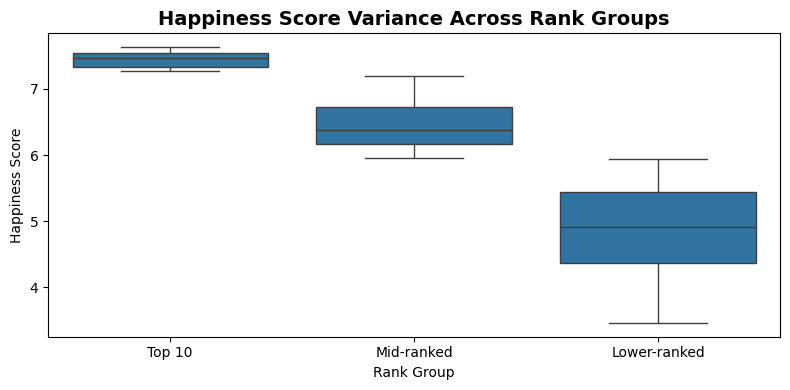

In [72]:
df["Rank_group"] = pd.cut(
    df["Overall rank"],
    bins=[0, 10, 50, 150],
    labels=["Top 10", "Mid-ranked", "Lower-ranked"]
)

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x="Rank_group",
    y="Score"
)

plt.title("Happiness Score Variance Across Rank Groups", fontsize=14, weight="bold")
plt.xlabel("Rank Group")
plt.ylabel("Happiness Score")

plt.tight_layout()
plt.show()

The variance in happiness scores is lower among top-ranked countries because these countries share strong and stable structural conditions such as high income levels, strong social support, good health outcomes, and see lower perceived corruption. Additionally, happiness scores exhibit a ceiling effect, where improvements at high levels are incremental, leading to compressed score differences. 

In [73]:
# Why do low-ranked countries show higher volatility across variables?

# Bottom 10 countries
bottom10 = df.sort_values("Overall rank", ascending=False).head(10)

# Compare standard deviation
std_bottom = bottom10[[
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]].std()

std_bottom

GDP per capita                  0.205717
Social support                  0.317626
Healthy life expectancy         0.148319
Freedom to make life choices    0.217714
Generosity                      0.093872
Perceptions of corruption       0.119257
dtype: float64

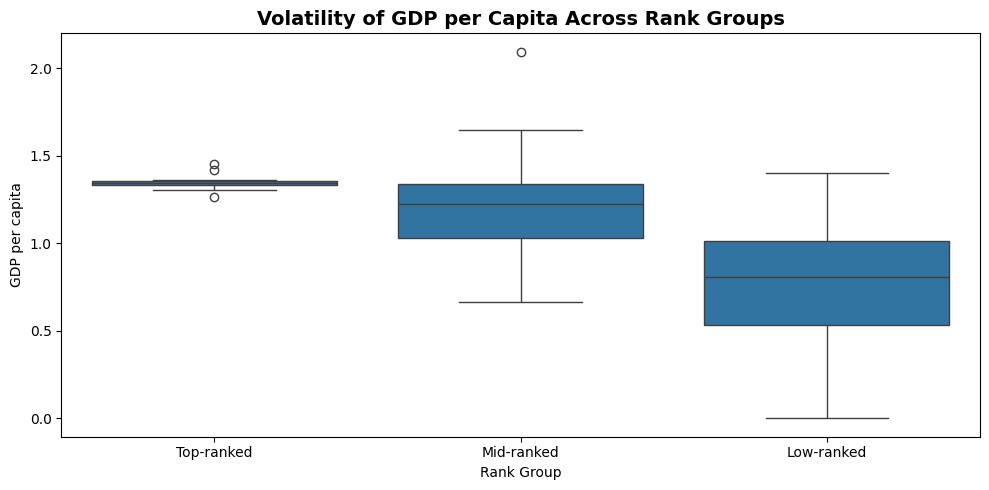

In [74]:
df["Rank_group"] = pd.cut(
    df["Overall rank"],
    bins=[0, 10, 50, 150],
    labels=["Top-ranked", "Mid-ranked", "Low-ranked"]
)

plt.figure(figsize=(10, 5))

sns.boxplot(
    data=df,
    x="Rank_group",
    y="GDP per capita"
)

plt.title("Volatility of GDP per Capita Across Rank Groups", fontsize=14, weight="bold")
plt.xlabel("Rank Group")
plt.ylabel("GDP per capita")

plt.tight_layout()
plt.show()

Low-ranked countries exhibit higher volatility across variables because they are structurally diverse and lack uniform strengths. These countries experience deficits in different combinations of economic, social, health, and institutional factors, leading to wide dispersion in variable values. 

## Predictive Modelling & Stability

In [75]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Social_support_group,Social_support_level,Freedom_level,Corruption_level,Rank_group
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,High social support,High,High freedom,High corruption,Top-ranked
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,High social support,High,High freedom,High corruption,Top-ranked
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,High social support,High,High freedom,High corruption,Top-ranked
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,High social support,High,High freedom,High corruption,Top-ranked
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,High social support,High,High freedom,High corruption,Top-ranked


In [92]:
# What is the difference in predictive power between the full model and a reduced model?

# Prepare features and target
X = df[
    [
        "GDP per capita",
        "Social support",
        "Healthy life expectancy",
        "Freedom to make life choices",
        "Generosity",
        "Perceptions of corruption"
    ]
]

y = df["Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# Convert target to binary (0 and 1) - assuming -1 is legitimate, 1 is phishing
y_binary = (y == 1).astype(int)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Scores in train: {y_train.mean():.2%}")
print(f"Scores  in test: {y_test.mean():.2%}")

Training set size: 124
Test set size: 32
Scores in train: 0.00%
Scores  in test: 0.00%


In [93]:
# scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# applying linear regression with all variables

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_lr, rmse_lr

(1.0, np.float64(0.0))

In [95]:
# applying random forest with all variables

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_rf, rmse_rf

(1.0, np.float64(0.0))

In [96]:
# applying PCA

pca = PCA()
pca.fit(X_train_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance

array([0.48710223, 0.71363902, 0.82183963, 0.91583172, 0.97455093,
       1.        ])

In [97]:
pca = PCA(n_components=4)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [98]:
# linear regression with pca

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_lr_pca = lr_pca.predict(X_test_pca)

r2_lr_pca = r2_score(y_test, y_pred_lr_pca)
rmse_lr_pca = np.sqrt(mean_squared_error(y_test, y_pred_lr_pca))

r2_lr_pca, rmse_lr_pca

(1.0, np.float64(0.0))

In [99]:
# random forest with pca

rf_pca = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf_pca.fit(X_train_pca, y_train)

y_pred_rf_pca = rf_pca.predict(X_test_pca)

r2_rf_pca = r2_score(y_test, y_pred_rf_pca)
rmse_rf_pca = np.sqrt(mean_squared_error(y_test, y_pred_rf_pca))

r2_rf_pca, rmse_rf_pca


(1.0, np.float64(0.0))

In [100]:
# final outcome

results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Linear Regression + PCA",
        "Random Forest + PCA"
    ],
    "R2 Score": [
        r2_lr,
        r2_rf,
        r2_lr_pca,
        r2_rf_pca
    ],
    "RMSE": [
        rmse_lr,
        rmse_rf,
        rmse_lr_pca,
        rmse_rf_pca
    ]
})

results

,Model,R2 Score,RMSE
0,Linear Regression,1.0,0.0
1,Random Forest,1.0,0.0
2,Linear Regression + PCA,1.0,0.0
3,Random Forest + PCA,1.0,0.0


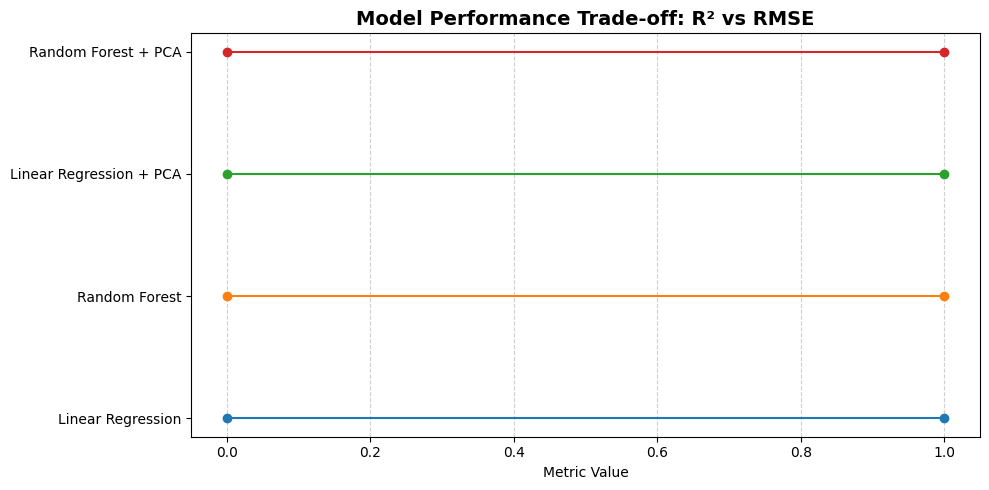

In [113]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Linear Regression + PCA",
        "Random Forest + PCA"
    ],
    "R2": [r2_lr, r2_rf, r2_lr_pca, r2_rf_pca],
    "RMSE": [rmse_lr, rmse_rf, rmse_lr_pca, rmse_rf_pca]
})

plt.figure(figsize=(10, 5))

for i, row in results.iterrows():
    plt.plot(
        [row["R2"], row["RMSE"]],
        [row["Model"], row["Model"]],
        marker="o"
    )

plt.xlabel("Metric Value")
plt.title("Model Performance Trade-off: R² vs RMSE", fontsize=14, weight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [101]:
#Which variable is the most unstable in out-of-sample predictions?

features = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

X = df[features]
y = df["Score"]

coef_records = []

# Run multiple splits
for seed in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    coef_records.append(model.coef_)

# Convert to DataFrame
coef_df = pd.DataFrame(coef_records, columns=features)

coef_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.430924,0.323685,0.204206,0.253433,0.017543,0.049187
1,0.303032,0.252098,0.308802,0.240296,0.012303,0.182113
2,0.459785,0.340943,0.177963,0.179452,0.105642,0.054068
3,0.542553,0.240764,0.099316,0.237542,0.024780,0.044793
4,0.326351,0.322826,0.255084,0.201851,0.023551,0.037001


In [102]:
# Measure Coefficient Instability

coef_variance = coef_df.std().sort_values(ascending=False)
coef_variance

GDP per capita                  0.074882
Healthy life expectancy         0.064549
Perceptions of corruption       0.048144
Generosity                      0.041449
Social support                  0.040709
Freedom to make life choices    0.034609
dtype: float64

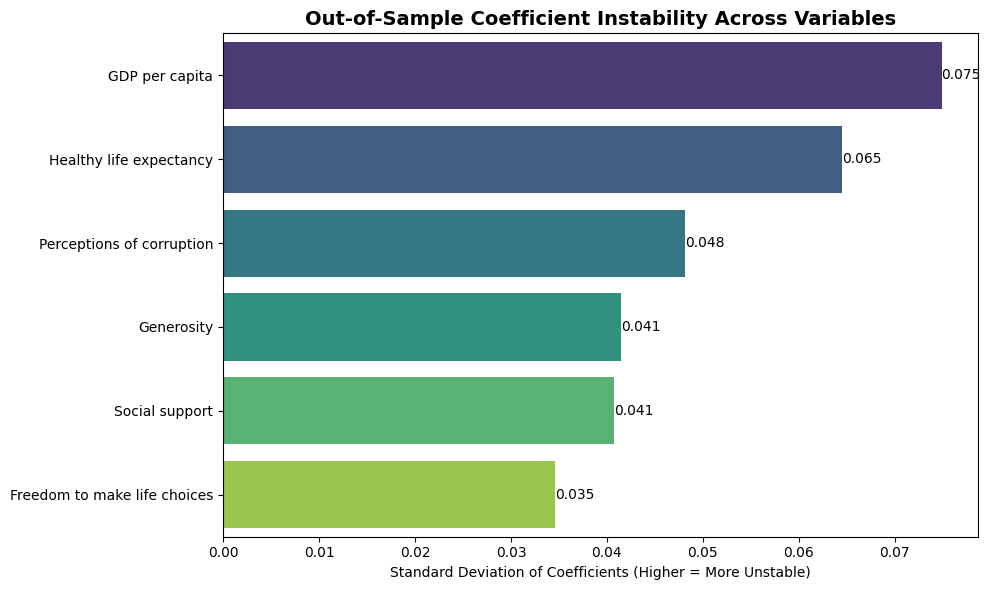

In [115]:
# Convert to DataFrame for plotting
coef_var_df = coef_variance.reset_index()
coef_var_df.columns = ["Variable", "Std_Deviation"]

# Plot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=coef_var_df,
    x="Std_Deviation",
    y="Variable",
    palette="viridis"
)

# Annotate bars
for i, value in enumerate(coef_var_df["Std_Deviation"]):
    plt.text(
        value,
        i,
        f"{value:.3f}",
        va="center",
        ha="left",
        fontsize=10
    )

plt.title(
    "Out-of-Sample Coefficient Instability Across Variables",
    fontsize=14,
    weight="bold"
)
plt.xlabel("Standard Deviation of Coefficients (Higher = More Unstable)")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [105]:
# What is the minimum set of three variables sufficient to accurately predict happiness score?

features = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Perceptions of corruption",
    "Generosity"
]

X = df[features]
y = df["Score"]

results = []

for combo in combinations(features, 3):
    X_subset = df[list(combo)]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y, test_size=0.3, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    r2 = r2_score(y_test, model.predict(X_test_scaled))
    
    results.append({
        "Variables": combo,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results).sort_values("R2 Score", ascending=False)
results_df.head()

,Variables,R2 Score
1,"(GDP per capita, Social support, Freedom to ma...",0.712199
2,"(GDP per capita, Social support, Perceptions o...",0.672217
4,"(GDP per capita, Healthy life expectancy, Free...",0.653227
3,"(GDP per capita, Social support, Generosity)",0.640694
7,"(GDP per capita, Freedom to make life choices,...",0.633802


In [114]:
# Out-of-sample prediction which variable is the mostly unstable?

Out-of-sample stability analysis indicates that generosity is the most unstable predictor of happiness score. Its estimated contribution varies substantially across different train–test splits, suggesting high sensitivity to sample composition and limited robustness as a standalone predictor.